In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/tanya/Downloads/loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.shape

(614, 13)

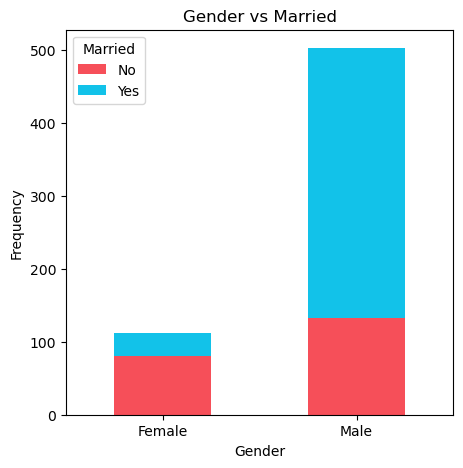

In [10]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

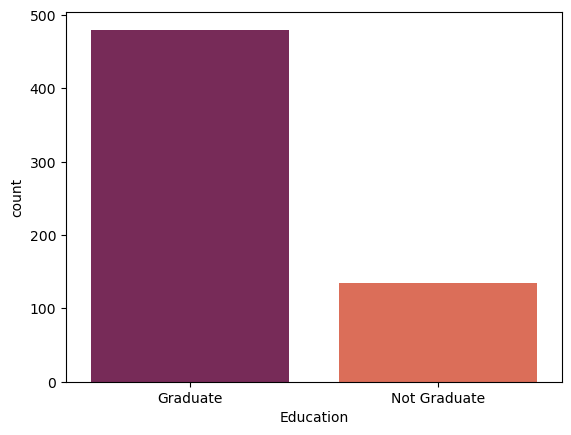

In [11]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

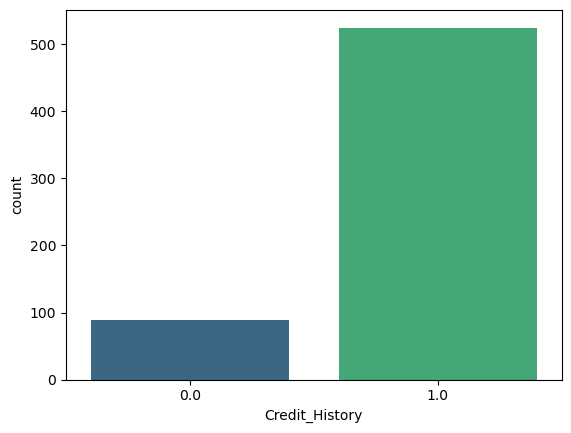

In [12]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

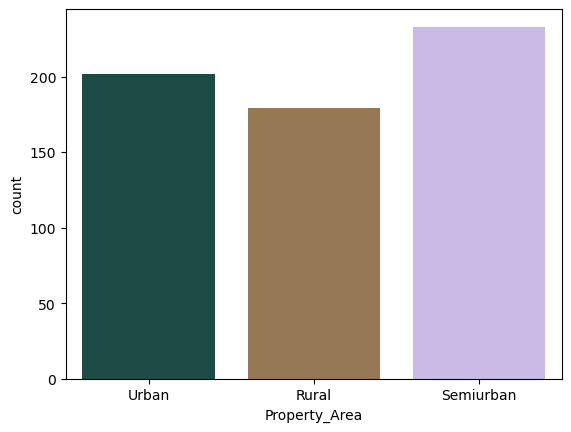

In [13]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

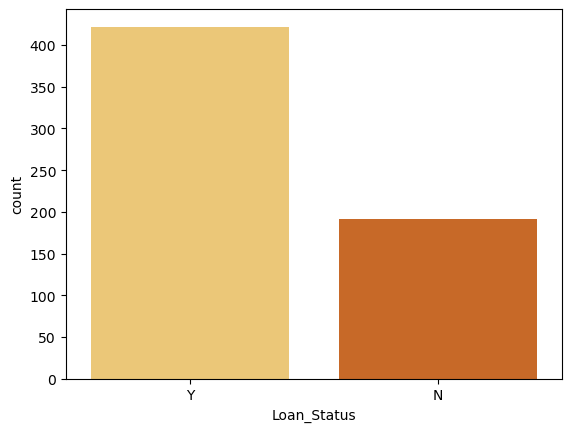

In [14]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

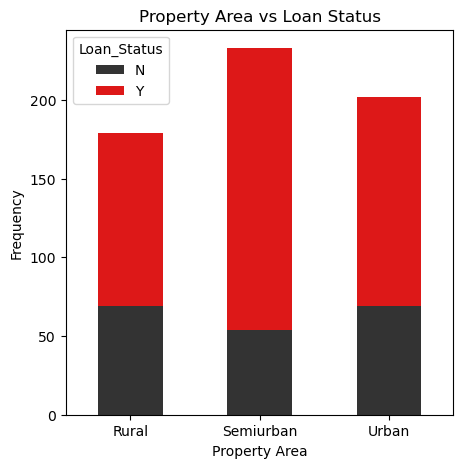

In [15]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [16]:
df = df.drop(['Loan_ID'], axis = 1)

In [17]:
#converting categorical values to numbers
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
# convertind the Dependents column
Dependents_ = pd.to_numeric(df.Dependents)
# dropping the previous Dependents column
df.drop(['Dependents'], axis = 1, inplace = True)
# concatination of the new Dependents column with both datasets
df = pd.concat([df, Dependents_], axis = 1)

<AxesSubplot:>

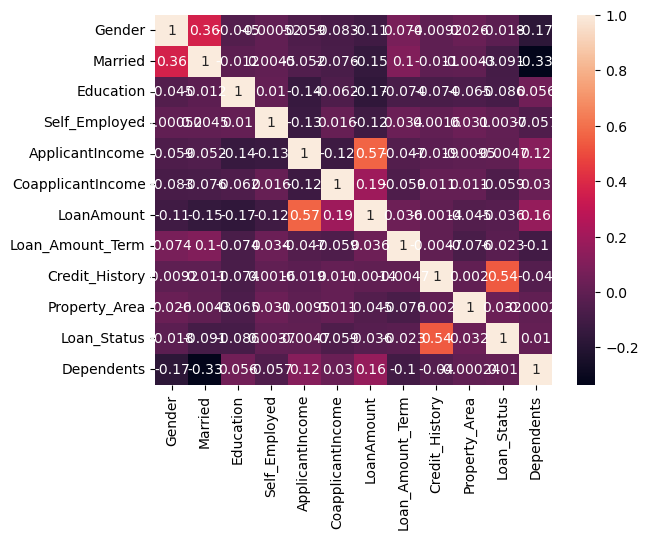

In [18]:
sns.heatmap(df.corr(), annot = True)

In [19]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,2,1,2,5849,0.0,146.412162,360.0,1.0,3,1,0
1,1,1,1,2,4583,1508.0,128.000000,360.0,1.0,1,0,1
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,3,1,0
3,1,1,2,2,2583,2358.0,120.000000,360.0,1.0,3,1,0
4,1,2,1,2,6000,0.0,141.000000,360.0,1.0,3,1,0


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

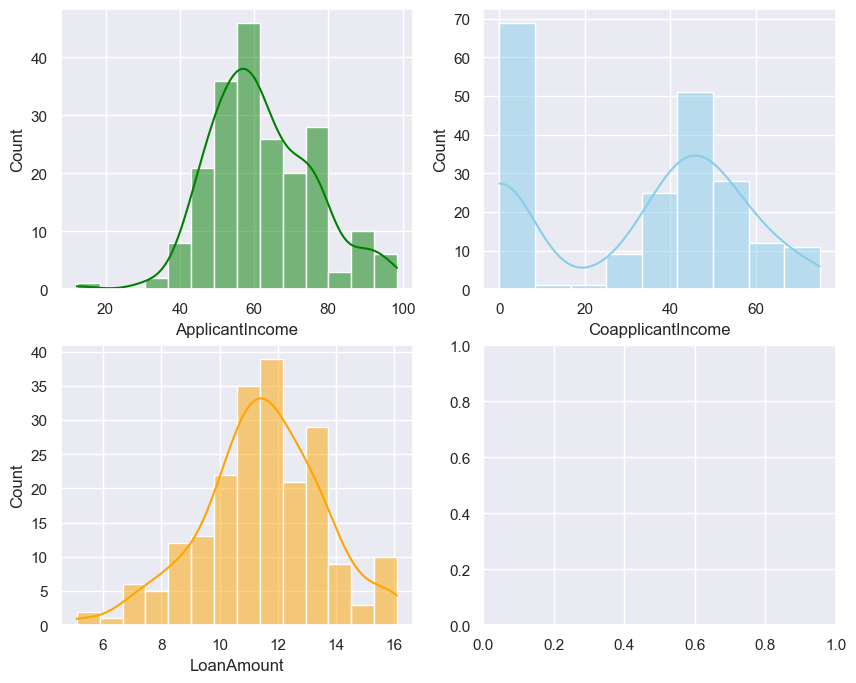

In [22]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [23]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [24]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression 
m1=LogisticRegression()
m1.fit(xtrain,ytrain)
yp1=m1.predict(xtest)


from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
yp2=m2.predict(xtest)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp1))
print(" confusion matrix is ",confusion_matrix(ytest,yp1))

Logistic Regression :
 accuracy is  0.8571428571428571
 precision score is  0.8571428571428571
 recall is  1.0
 f1 score is  0.923076923076923
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42

 confusion matrix is  [[ 0  6]
 [ 0 36]]


In [27]:
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp2))
print(" confusion matrix is ",confusion_matrix(ytest,yp2))

Decision Tree Classifier :
 accuracy is  0.7142857142857143
 precision score is  0.8529411764705882
 recall is  0.8055555555555556
 f1 score is  0.8285714285714286
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.12      0.17      0.14         6
           1       0.85      0.81      0.83        36

    accuracy                           0.71        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.75      0.71      0.73        42

 confusion matrix is  [[ 1  5]
 [ 7 29]]


In [28]:
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("***********************************************************************************************************")
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))

Logistic Regression :
 accuracy is  0.8571428571428571
 precision score is  0.8571428571428571
 recall is  1.0
 f1 score is  0.923076923076923
***********************************************************************************************************
Decision Tree Classifier :
 accuracy is  0.7142857142857143
 precision score is  0.8529411764705882
 recall is  0.8055555555555556
 f1 score is  0.8285714285714286
